In [1]:
import torch
from torch import nn
from torch import optim

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/train.csv')
df.head()

,Unnamed: 0,x,y
0,0,0.771270,2.474538
1,1,0.063558,1.192772
2,2,0.863103,2.912784
3,3,0.025419,1.078507
4,4,0.731994,2.473164


In [3]:
x_train = torch.tensor(df['x'].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(df['y'].values, dtype=torch.float32)

In [4]:
df = pd.read_csv('dataset/test.csv')
df.head()

,Unnamed: 0,x,y
0,0,0.304614,1.615251
1,1,0.155995,1.347700
2,2,0.662522,2.234106
3,3,0.107891,1.298501
4,4,0.909320,2.893834


In [5]:
x_test = torch.tensor(df['x'].values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(df['y'].values, dtype=torch.float32)

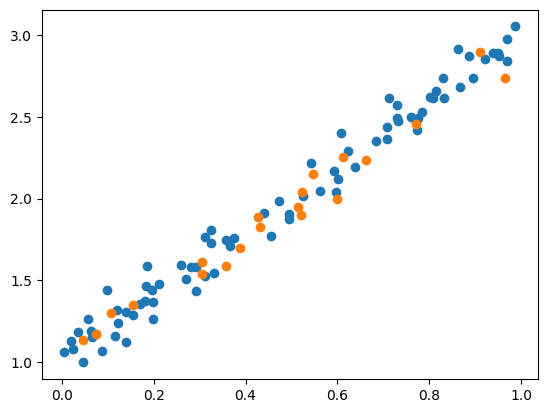

In [6]:
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')

In [7]:
model = nn.Linear(1, 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [8]:
loss_fn = nn.MSELoss()

In [9]:
model.parameters()

<generator object Module.parameters at 0x111578580>

In [10]:
for name, param in model.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[0.0897]], requires_grad=True)
bias Parameter containing:
tensor([-0.0936], requires_grad=True)


In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [12]:
N = 500
loss_hist = []
for iter in range(N):
    yp = model(x_train)
    loss = loss_fn(yp.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist.append(loss.item())
    print(loss.item())

4.359279155731201
2.508296012878418
1.4611231088638306
0.868193507194519
0.5319777727127075
0.3408573865890503
0.23175959289073944
0.16904301941394806
0.13256695866584778
0.11094963550567627
0.09775860607624054
0.08935825526714325
0.08369338512420654
0.07960174232721329
0.07642577588558197
0.07379314303398132
0.07149265706539154
0.0694042295217514
0.06745926290750504
0.06561829894781113
0.06385837495326996
0.06216578930616379
0.060532212257385254
0.05895229056477547
0.057422347366809845
0.05593978241086006
0.054502516984939575
0.05310880392789841
0.05175717920064926
0.050446219742298126
0.049174658954143524
0.04794127866625786
0.04674490913748741
0.04558442160487175
0.044458746910095215
0.04336683079600334
0.04230766370892525
0.04128025844693184
0.04028366878628731
0.039316948503255844
0.03837921842932701
0.03746960312128067
0.03658727928996086
0.035731397569179535
0.03490119054913521
0.034095872193574905
0.03331470489501953
0.03255695849657059
0.031821928918361664
0.031108945608139038

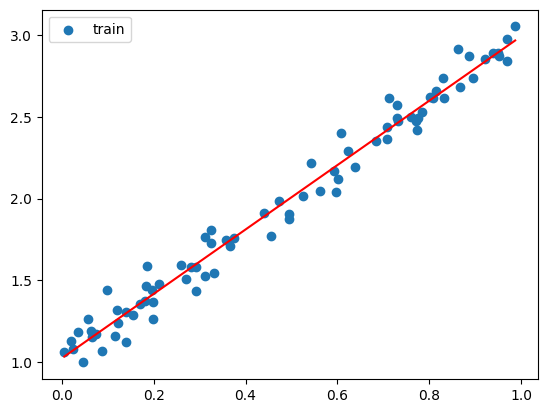

In [13]:
x_viz = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
y_viz = model(x_viz)

plt.scatter(x_train, y_train, label='train')
plt.plot(x_viz.detach(), y_viz.detach(), 'r')
plt.legend()

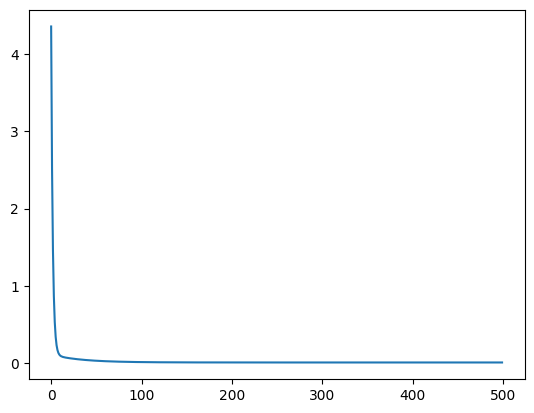

In [14]:
plt.plot(range(N), loss_hist)

In [ ]:
import torch.nn.functional as F

yp = model(x_test)
loss = F.l1_loss(yp.squeeze(), y_test)  
print(loss)  

tensor(0.0736, grad_fn=<MeanBackward0>)
